# Logistic Regression

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def logit_func(x):
    return np.log(x/(1-x))

def sigmoid_func(x):
    return 1. / (1 + np.exp(-x))

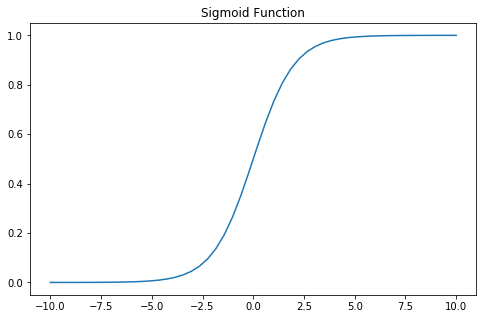

In [3]:
x = np.linspace(-10, 10, 50)
y = sigmoid_func(x)
plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.show()

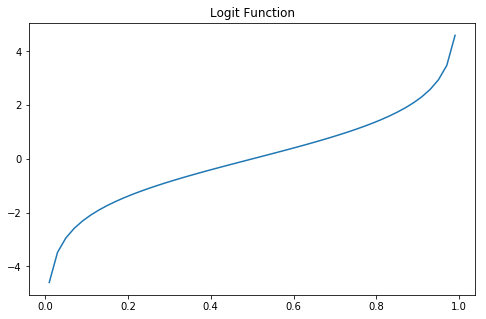

In [4]:
x = np.linspace(0.01, 0.99, 50)
y = logit_func(x)
plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.title("Logit Function")
plt.show()

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.


The equation can be rearranged into the **logistic function**:

$$p = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

Notes:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data.

#### College Admissions 

The college admissions data indicates whether a given student was admitted into a college based on his gre score, gpa, and the rank of his previous institution (rank 1 refers to a top tier institution)

In [5]:
college = pd.read_csv('data/college/collegeadmissions.csv')
college.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


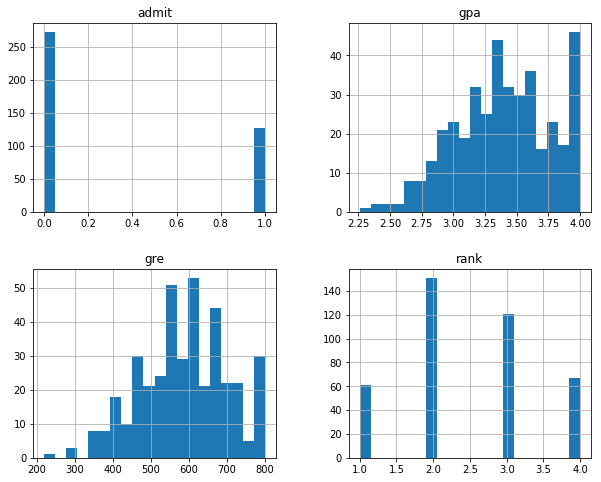

In [6]:
college.hist(figsize=(10,8), bins = 20)
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


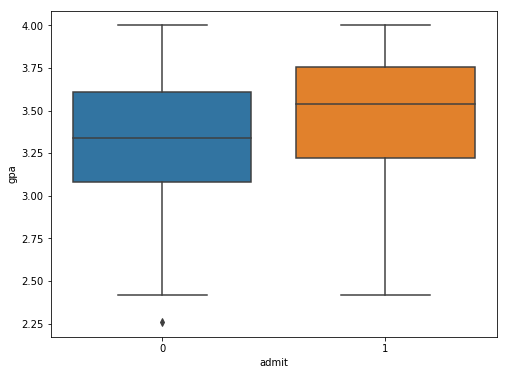

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot("admit", "gpa", data=college)
plt.show()

In [8]:
pd.crosstab(college["rank"], college["admit"])

admit,0,1
rank,,
1,28,33
2,97,54
3,93,28
4,55,12


In [9]:
college.groupby("rank")["admit"].mean()

rank
1    0.540984
2    0.357616
3    0.231405
4    0.179104
Name: admit, dtype: float64

In [10]:
college = college.join(pd.get_dummies(college['rank'], drop_first=True, prefix="rank"))
college.head()

,admit,gre,gpa,rank,rank_2,rank_3,rank_4
0,0,380,3.61,3,0,1,0
1,1,660,3.67,3,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,4,0,0,1
4,0,520,2.93,4,0,0,1


### Sklearn 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Note that Sklearn's implementation includes a regularization parameter C where smaller values specify stronger regularization.

In [11]:
model = LogisticRegression(C=1e9)
factors = ['gre', 'gpa', "rank_2", "rank_3", "rank_4"]
model.fit(college[factors], college['admit'])

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [12]:
print(model.coef_)
print(model.intercept_)

[[ 0.00225514  0.8017655  -0.67456784 -1.33708167 -1.5502974 ]]
[-3.97765654]


In [16]:
accuracy_score(college["admit"], model.predict(college[factors]))

0.71

Observe that the regularization serves to shrink the coefficient parameters

In [13]:
model2 = LogisticRegression()
model2.fit(college[factors], college['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
print(model2.coef_)
print(model2.intercept_)

[[ 0.00180407  0.24130159 -0.605262   -1.17928556 -1.35680322]]
[-1.85817399]


In [17]:
accuracy_score(college["admit"], model2.predict(college[factors]))

0.705

### Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features
- Can't automatically learn feature interactions